In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
df_skincare = pd.read_csv('ulta_skincare.csv')
print(df_skincare.shape)
df_skincare.sample(3)

(4119, 9)


,Product_brand,Product_category,Product_details,Product_name,Product_price,Product_rating,Product_size,Top_category,Tot_reviews
7,Pacifica,Treatment & Serums,Pacifica's Pore Warrior Booster Serum is built...,Pore Warrior Booster Serum,$16.00,NaN,Size 1.0 oz,Skin Care,NaN
3593,StriVectin,Cleansers,Comforting Creamy Cleanser from StriVectin is ...,Online Only Comforting Cream Cleanser,$29.00,4.70 out of 5 stars,Size 5 oz,Skin Care,37.0
1446,Neutrogena,Gifts & Value Sets,Works quickly for visible results in just one ...,Rapid Tone Repair Moisturizer Night,$23.99,4.10 out of 5 stars,Size 1 oz,Skin Care,98.0


In [4]:
df_makeup = pd.read_csv('ulta_makeup.csv')
print(df_makeup.shape)
df_makeup.sample(3)

(5298, 9)


,Product_brand,Product_category,Product_details,Product_name,Product_price,Product_rating,Product_size,Top_category,Tot_reviews
2050,BH Cosmetics,Eyes,Adorn your eyes in decadence with the ItsMyRay...,ItsMyRayeRaye - 15 Color Shadow Palette,$17.50,4.80 out of 5 stars,Size 0.49 oz,Makeup,26.0
829,Wet n Wild,Face,Slip on Wet n Wild's lightweight water-based P...,Photo Focus Water Drop Primer,$5.99,3.40 out of 5 stars,Size 0.68 oz,Makeup,13.0
446,Dermadoctor,Face,Helps support a healthy complexion. The alphab...,DD Cream Dermatologically Defining BB Cream Br...,$40.00,4.00 out of 5 stars,Size 1.3 oz,Makeup,124.0


### To combine the multiple dataframe into one using pd.concat

In [5]:
df = pd.concat([df_skincare,df_makeup],axis = 0)
df.index = range(0, len(df))
print(df.shape)
df.sample(3)

(9417, 9)


,Product_brand,Product_category,Product_details,Product_name,Product_price,Product_rating,Product_size,Top_category,Tot_reviews
6265,Dose Of Colors,Eyes,Dose Of Colors x iluvsarahii Eyeshadow Palette...,Online Only Dose Of Colors x iluvsarahii Eyesh...,$35.00,3.90 out of 5 stars,Item 2534621,Makeup,65.0
1712,DERMAFLASH,Tools,Powered by ultrasonic skin scrubbing and infus...,Online Only DERMAPORE Ultrasonic Pore Extracto...,$99.00,4.20 out of 5 stars,Item 2553240,Skin Care,86.0
6727,FLOWER Beauty,Eyes,Get the pumped up punk royal look with +112% s...,Warrior Princess Mascara,$9.99,4.40 out of 5 stars,Size 0.35 oz,Makeup,19.0


In [6]:
df.dtypes

Product_brand        object
Product_category     object
Product_details      object
Product_name         object
Product_price        object
Product_rating       object
Product_size         object
Top_category         object
Tot_reviews         float64
dtype: object

In [7]:
np.sum(df.isnull())

Product_brand         1
Product_category      0
Product_details      10
Product_name          1
Product_price       241
Product_rating      526
Product_size          1
Top_category          0
Tot_reviews         617
dtype: int64

In [8]:
df.to_csv('Original Data.csv') 
df.sample(3)

,Product_brand,Product_category,Product_details,Product_name,Product_price,Product_rating,Product_size,Top_category,Tot_reviews
5221,beautyblender,Face,beautyblender Re-Dew Set & Refresh Spray is a ...,Online Only Re-Dew Set & Refresh Spray,$30.00,3.30 out of 5 stars,Size 1.69 oz,Makeup,7.0
1510,Peter Thomas Roth,Gifts & Value Sets,Peter Thomas Roth's Peptide 21 Wrinkle Resist ...,Peptide 21 Wrinkle Resist Kit,$65.00,4.60 out of 5 stars,Item 2549895,Skin Care,5.0
4644,e.l.f. Cosmetics,Face,This beautiful e.l.f. Cosmetics Contour Palett...,Contour Palette,$8.00,3.70 out of 5 stars,Size 0.56 oz,Makeup,102.0


### Rearrange columns order

In [9]:
df = df[['Top_category','Product_category','Product_brand','Product_name','Product_rating','Tot_reviews','Product_price','Product_size','Product_details']]
df.sample(5)

,Top_category,Product_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price,Product_size,Product_details
6553,Makeup,Eyes,Maybelline,Volum' Express Pumped Up! Colossal Waterproof ...,3.80 out of 5 stars,31.0,$7.99,Size 0.33 oz,"Lashes go bigger, bolder, more extreme with Ma..."
495,Skin Care,Cleansers,Formula 10.0.6,Bare Face Beauty Skin-Hydrating Cleansing Oil,3.90 out of 5 stars,96.0,$8.99,Size 3.7 oz,Only at ULTA!
4642,Makeup,Face,Pacifica,Neutralizing Mattifier Soft Focus Translucent ...,4.10 out of 5 stars,51.0,$12.00,Size 0.28 oz,Pacifica's Neutralizing Mattifier Soft Focus T...
8004,Makeup,Lips,Morphe,Online Only Pop Of Pastel Matte Lipstick Trio,NaN,NaN,$18.00,Item 2560716,Exclusive.
5109,Makeup,Face,Makeup Revolution,Hydrate Primer,3.70 out of 5 stars,3.0,$8.00,Size 0.95 oz,Exclusive.


### Remove rows that have any missing  values

In [10]:
df = df.dropna(axis=0, how='any')  
df.shape

(8565, 9)

In [11]:
np.sum(df.isnull())

Top_category        0
Product_category    0
Product_brand       0
Product_name        0
Product_rating      0
Tot_reviews         0
Product_price       0
Product_size        0
Product_details     0
dtype: int64

### Convert column type

In [12]:
df.Product_price = df.Product_price.apply(lambda x:float(''.join(list(x)[1:])))  # convert string $66.00 to float 66.00
df.Product_price.dtype

dtype('float64')

In [13]:
df.Product_price.describe()

count    8565.000000
mean       23.923372
std        22.967391
min         0.970000
25%         9.990000
50%        18.000000
75%        30.000000
max       429.000000
Name: Product_price, dtype: float64

In [14]:
df.Product_rating =  df.Product_rating.apply(lambda x:float(x.split()[0]))

In [15]:
df.dtypes

Top_category         object
Product_category     object
Product_brand        object
Product_name         object
Product_rating      float64
Tot_reviews         float64
Product_price       float64
Product_size         object
Product_details      object
dtype: object

In [16]:
df.describe()

,Product_rating,Tot_reviews,Product_price
count,8565.000000,8565.000000,8565.000000
mean,4.210928,203.399066,23.923372
std,0.587500,629.844772,22.967391
min,1.000000,1.000000,0.970000
25%,4.000000,10.000000,9.990000
50%,4.300000,40.000000,18.000000
75%,4.600000,148.000000,30.000000
max,5.000000,14165.000000,429.000000


### Filter out rows that have less than 10 reviews

In [17]:
df_filtered = df[df.Tot_reviews>10]
df_filtered.shape

(6310, 9)

In [18]:
df_filtered.sample(3)

,Top_category,Product_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price,Product_size,Product_details
7401,Makeup,Makeup Brushes & Tools,bareMinerals,Quick Change Brush Cleaner,4.4,87.0,18.00,Size 3.7 oz,Like to explore different looks? Use bareMiner...
1048,Skin Care,Moisturizers,L'Oréal,Age Perfect Hydra Nutrition Honey Night Balm P...,4.4,528.0,19.99,Size 1.7 oz,L'Oreal's Age Perfect Hydra Nutrition Honey Ni...
7678,Makeup,Lips,Lime Crime,Online Only Metallic Velvetine Lipstick,4.2,29.0,20.00,Size 0.088 oz,The original liquid metallic lipstick inspired...


In [19]:
df_filtered[['Product_rating','Tot_reviews','Product_price']].agg(["count","min","mean"])

,Product_rating,Tot_reviews,Product_price
count,6310.000000,6310.000000,6310.000000
min,1.300000,11.000000,0.970000
mean,4.206624,274.452298,23.545239


In [20]:
df.corr(method = "pearson")[['Product_rating']]

,Product_rating
Product_rating,1.00000
Tot_reviews,0.05167
Product_price,0.11920


In [21]:
df_filtered.corr(method = "pearson")[['Product_rating']]

,Product_rating
Product_rating,1.000000
Tot_reviews,0.079206
Product_price,0.154769


Ratings are poorly correlated with number of reviews and product price 

### Histogram of Product Rating for all products 

Text(0.5, 1.0, 'Histogram of Product Rating for All Products')

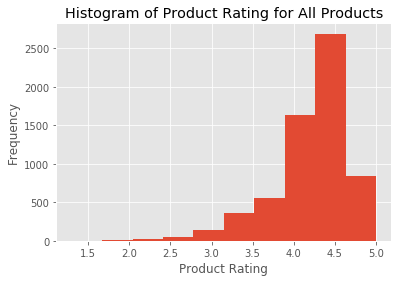

In [22]:
df_filtered.Product_rating.plot.hist() # Overall rating histogram
plt.xlabel('Product Rating')
plt.title('Histogram of Product Rating for All Products')

### Histogram of Product Rating for SkinCare Products only

In [23]:
df_skincare = df_filtered[df_filtered['Top_category']=="Skin Care"]

Text(0.5, 1.0, 'Histogram of Product Rating for Skincare Products')

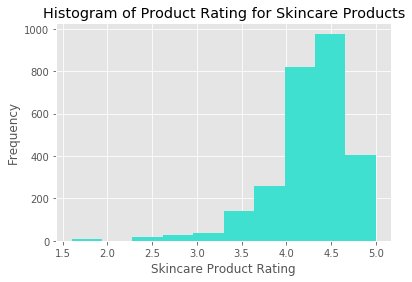

In [24]:
df_skincare.Product_rating.plot.hist(color = 'turquoise')
plt.xlabel('Skincare Product Rating')
plt.title('Histogram of Product Rating for Skincare Products')

### Histogram of Product Rating for Makeup Products only

In [25]:
df_makeup = df_filtered[df_filtered['Top_category']=="Makeup"]

Text(0.5, 1.0, 'Histogram of Product Rating for Makeup Products')

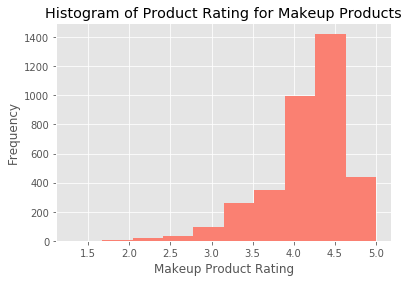

In [26]:
df_makeup.Product_rating.plot.hist(color = 'salmon')
plt.xlabel('Makeup Product Rating')
plt.title('Histogram of Product Rating for Makeup Products')

### Two Sample t-test on rating from two top categories: skincare and makeup
Check if the rating has the same mean from skin care and makeup 

In [27]:
skincare_rating = np.array(df_skincare['Product_rating'])
stats.describe(skincare_rating)

DescribeResult(nobs=2691, minmax=(1.6, 5.0), mean=4.266146413972502, variance=0.20667135253267468, skewness=-1.719183043020058, kurtosis=4.822912698097661)

In [28]:
makeup_rating = np.array(df_makeup.Product_rating)
stats.describe(makeup_rating)

DescribeResult(nobs=3619, minmax=(1.3, 5.0), mean=4.162365294280187, variance=0.23728970510806016, skewness=-1.2475082108182378, kurtosis=2.2009431006337152)

In [29]:
stats.ttest_ind(skincare_rating, makeup_rating)

Ttest_indResult(statistic=8.610042712319085, pvalue=9.118010066448922e-18)

The p-value is extremely small. This indicates that the ratings for skincare and makeup products are statistically different. Therefore, the following analysis will look at each category separately. 

### Boxplot of Product Rating for Skin Care Products Only

In [30]:
# To rearrang the order of category by product rating median 
def df_index_by_median(df,by,column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values(ascending = False)
    return list(meds.index)

Text(0.5, 1.0, 'Comparison on Product Rating for Skincare Category')

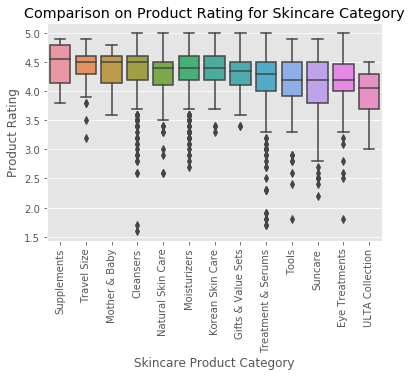

In [31]:
sns.boxplot(x='Product_category', y='Product_rating', data= df_skincare, order = df_index_by_median(df_skincare, by = "Product_category", column="Product_rating"))
plt.xlabel('Skincare Product Category')
plt.ylabel('Product Rating')
plt.xticks(rotation=90)
plt.title('Comparison on Product Rating for Skincare Category')

### Boxplot of Product Rating for Makeup Products Only

Text(0.5, 1.0, 'Comparison on Product Rating for Makeup Category')

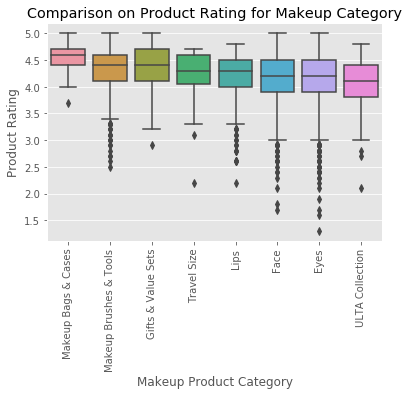

In [32]:
sns.boxplot(x='Product_category', y='Product_rating', data= df_makeup, order = df_index_by_median(df_makeup, by = "Product_category", column="Product_rating"))
plt.xlabel('Makeup Product Category')
plt.ylabel('Product Rating')
plt.xticks(rotation=90)
plt.title('Comparison on Product Rating for Makeup Category')

### Average Rating and Price for Skincare Products

In [33]:
df_skincare_rating = pd.DataFrame(df_skincare.groupby('Product_category').agg({'Product_rating':'mean'})).sort_values(by = "Product_rating",ascending = False)
lis = list(df_skincare_rating.index)

In [34]:
df_skincare_price = pd.DataFrame(df_skincare.groupby('Product_category').agg({'Product_price':'mean'})).loc[lis]

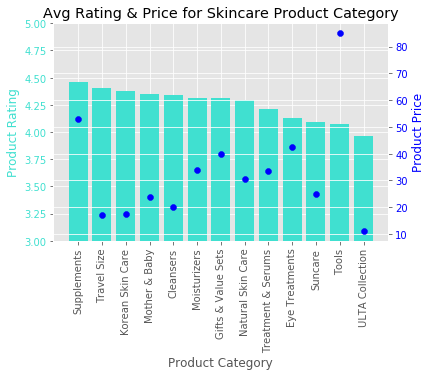

In [35]:
### Create a chart that has two y axis using plt.subplots()
fig, ax1 = plt.subplots()


ax1.set_xlabel('Product Category')
ax1.set_xticklabels(lis, rotation=90)
ax1.set_ylabel('Product Rating', color='turquoise')
ax1.bar(lis,df_skincare_rating['Product_rating'],color='turquoise')
ax1.tick_params(axis='y', labelcolor='turquoise')
ax1.set_ylim([3, 5])
ax1.set_title('Avg Rating & Price for Skincare Product Category')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('Product Price', color='b')  # we already handled the x-label with ax1
ax2.scatter(lis,df_skincare_price['Product_price'],color='b')
ax2.tick_params(axis='y', labelcolor='b')


# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(rotation=90)
plt.show()


Avg Rating for Skincare Products

Text(0.5, 1.0, 'Average Rating for Skincare Product Category')

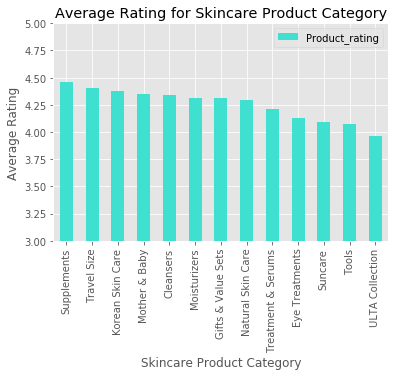

In [36]:
df_skincare_agg = df_skincare.groupby('Product_category').agg({'Product_rating':'mean'})
df_skincare_agg.sort_values(by = 'Product_rating', ascending = False).plot.bar(color = 'turquoise')
plt.xlabel('Skincare Product Category')
plt.ylabel('Average Rating')
plt.ylim(3, 5)  # to set the y axis limit 
plt.title('Average Rating for Skincare Product Category')

Avg Price for Skincare Products

Text(0.5, 1.0, 'Average Price for Skincare Product Category')

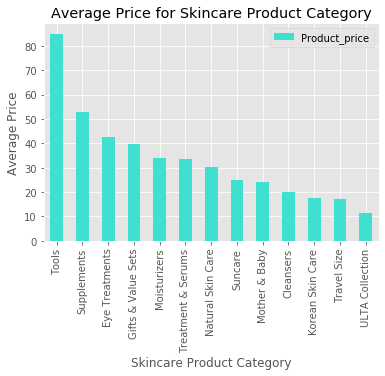

In [37]:
df_skincare_price = df_skincare.groupby('Product_category').agg({'Product_price':'mean'}).sort_values(by = "Product_price", ascending = False)
df_skincare_price.plot.bar(color = 'turquoise')
plt.xlabel('Skincare Product Category')
plt.ylabel('Average Price')
plt.title('Average Price for Skincare Product Category')

### Correlation between rating, total reviews and price for skincare  

In [38]:
df1 =df_skincare.groupby(['Product_category','Product_brand']).agg({'Product_rating':'mean','Tot_reviews': 'sum','Product_price':'mean'}).reset_index()
df1.corr(method='pearson')
### suggests a poor correlation between rating, total reviews and price

,Product_rating,Tot_reviews,Product_price
Product_rating,1.000000,0.031123,0.091568
Tot_reviews,0.031123,1.000000,0.017447
Product_price,0.091568,0.017447,1.000000


### Average Rating and Price for Makeup Products

Avg Rating for Makeup Products

In [39]:
df_makeup_rating = pd.DataFrame(df_makeup.groupby('Product_category').agg({'Product_rating':'mean'})).sort_values(by = "Product_rating",ascending = False)
lis = list(df_makeup_rating.index)

In [40]:
df_makeup_price = pd.DataFrame(df_makeup.groupby('Product_category').agg({'Product_price':'mean'})).loc[lis]

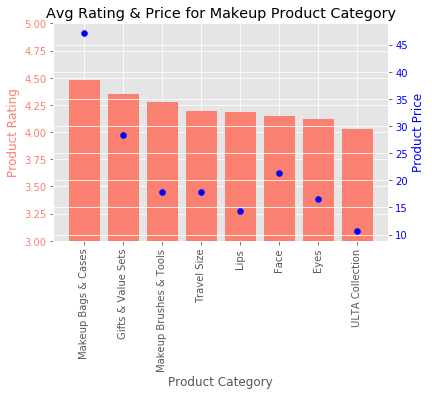

In [41]:
### Create a chart that has two y axis using plt.subplots()
fig, ax1 = plt.subplots()

ax1.set_xlabel('Product Category')
ax1.set_xticklabels(lis, rotation=90)
ax1.set_ylabel('Product Rating', color='salmon')
ax1.bar(lis,df_makeup_rating['Product_rating'],color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')
ax1.set_ylim([3, 5])
ax1.set_title('Avg Rating & Price for Makeup Product Category')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('Product Price', color='b')  # we already handled the x-label with ax1
ax2.scatter(lis,df_makeup_price['Product_price'],color='b')
ax2.tick_params(axis='y', labelcolor='b')


# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Average Rating for Makeup Product Category')

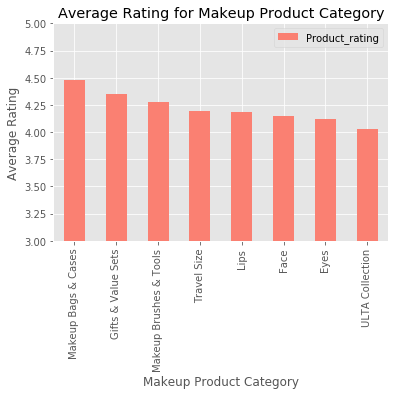

In [42]:
df_makeup_agg = df_makeup.groupby('Product_category').agg({'Product_rating':'mean'})
df_makeup_agg.sort_values(by = 'Product_rating', ascending = False).plot.bar(color = 'salmon')
plt.xlabel('Makeup Product Category')
plt.ylabel('Average Rating')
#plt.figure(figsize=(12,6))
plt.ylim(3, 5)  # to set the y axis limit 
plt.title('Average Rating for Makeup Product Category')

Avg Price for Makeup Products

Text(0.5, 1.0, 'Average Price for Makeup Product Category')

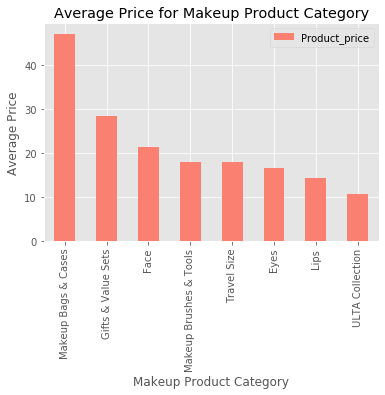

In [43]:
df_makeup_price = df_makeup.groupby('Product_category').agg({'Product_price':'mean'}).sort_values(by = "Product_price", ascending = False)
df_makeup_price.plot.bar(color = 'salmon')
plt.xlabel('Makeup Product Category')
plt.ylabel('Average Price')
plt.title('Average Price for Makeup Product Category')

### Correlation between rating, total reviews and price for makeup

In [44]:
df2 =df_makeup.groupby(['Product_category','Product_brand']).agg({'Product_rating':'mean','Tot_reviews': 'sum','Product_price':'mean'}).reset_index()
df2.corr(method='pearson')
### suggests a poor correlation between rating, total reviews and price

,Product_rating,Tot_reviews,Product_price
Product_rating,1.000000,0.003951,0.165012
Tot_reviews,0.003951,1.000000,-0.054793
Product_price,0.165012,-0.054793,1.000000


### Closer look at ULTA Skincare Collection

Text(0.5, 1.0, 'Histogram of ULTA Skincare Collection Rating')

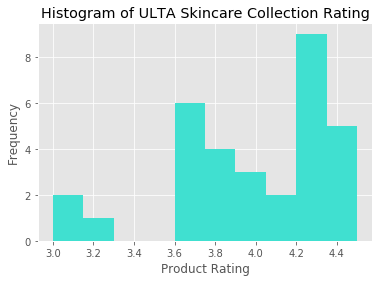

In [45]:
df_ULTA_skincare = df_skincare[df_skincare.Product_category == "ULTA Collection"]
#sns.distplot(df_ULTA_skincare.Product_rating,color = 'turquoise')
df_ULTA_skincare.Product_rating.plot.hist(color='turquoise')
plt.xlabel('Product Rating')
plt.title('Histogram of ULTA Skincare Collection Rating')

In [46]:
# ULTA Skincare Collection 5 Highest Rating Product
df_skincare[df_skincare.Product_category == "ULTA Collection"].sort_values(by='Product_rating',ascending=False).head(5)

,Top_category,Product_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price,Product_size,Product_details
241,Skin Care,ULTA Collection,ULTA,Double-Sided Sunless Tan Applicator Mitt,4.5,107.0,9.99,Item 2295771,Ulta's Double-Sided Sunless Tan Applicator Mit...
238,Skin Care,ULTA Collection,ULTA,Hydrating Coconut Mask,4.5,31.0,3.00,Size 0.88 oz,"Ulta's Hydrating Coconut Mask for dry, dehydra..."
251,Skin Care,ULTA Collection,ULTA,Waterfull Gel - Cream Moisturizer,4.5,157.0,19.50,Size 1.7 oz,Ulta's oil - free Waterfull Gel - Cream Moistu...
240,Skin Care,ULTA Collection,ULTA,Complexion Rollerball,4.5,42.0,10.00,Size 0.33 oz,Ulta's Complexion Rollerball with tea tree oil...
255,Skin Care,ULTA Collection,ULTA,Watermelon Sleeping Mask,4.4,83.0,16.00,Size 2 oz,"Wake up to glowing, radiant skin with Ulta Bea..."


In [47]:
# ULTA Skincare Collection 5 Lowest Rating Product
df_skincare[df_skincare.Product_category == "ULTA Collection"].sort_values(by='Product_rating',ascending=True).head(5)

,Top_category,Product_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price,Product_size,Product_details
256,Skin Care,ULTA Collection,ULTA,Advanced Cleansing Rotating Facial Cleansing B...,3.0,106.0,25.0,Item 2527728,Ulta's Advanced Cleansing Rotating Facial Clea...
219,Skin Care,ULTA Collection,ULTA,Buttercream Cupcake Lip Balm,3.0,12.0,8.0,Size 0.8 oz,Keep your lips moisturized all day long with t...
252,Skin Care,ULTA Collection,ULTA,24K Magic Hydrogel Eye Masks,3.2,28.0,22.0,Size 15 oz,Ulta Beauty's 24K Magic Hydrogel Eye Masks are...
222,Skin Care,ULTA Collection,ULTA,Blueberries & Yogurt Skin Balancing Superfood ...,3.6,12.0,8.0,Size 1.8 oz,Superfoods are jam-packed with nutrients that ...
235,Skin Care,ULTA Collection,ULTA,Clarifying Honey Peel Off Mask,3.6,35.0,3.0,Size 0.52 oz,Ulta's Clarifying Honey Peel Off Mask for cong...


### Closer Look at ULTA Makeup Collection

Text(0.5, 1.0, 'Histogram of ULTA Makeup Collection Rating')

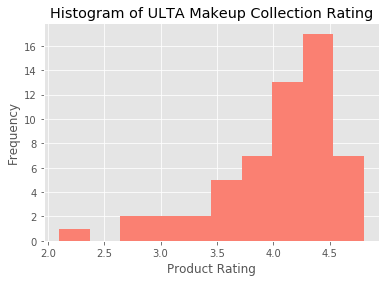

In [48]:
df_ULTA_makeup = df_makeup[df_makeup.Product_category == "ULTA Collection"]
#sns.distplot(df_ULTA_makeup.Product_rating,color = 'salmon')
df_ULTA_makeup.Product_rating.plot.hist(color='salmon')
plt.xlabel('Product Rating')
plt.title('Histogram of ULTA Makeup Collection Rating')


In [49]:
# ULTA Makeup Collection 5 Highest Rating Product
df_makeup[df_makeup.Product_category == "ULTA Collection"].sort_values(by='Product_rating',ascending=False).head(5)

,Top_category,Product_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price,Product_size,Product_details
9164,Makeup,ULTA Collection,ULTA,Frida Kahlo by Ulta Beauty Signature Box,4.8,65.0,30.00,Size 0.52 oz,Frida Kahlo by Ulta Beauty Signature Box is a ...
4405,Makeup,ULTA Collection,ULTA,Jumbo Cotton Balls,4.7,164.0,1.99,Size 70 ct,Includes 70 Ulta Jumbo Size Cotton Balls. For ...
4396,Makeup,ULTA Collection,ULTA,Beauty Smarts Eye Makeup Remover Mitts,4.6,76.0,4.97,Size 2 ct oz,Ulta's Eye Makeup Remover Mitts easily remove ...
9140,Makeup,ULTA Collection,ULTA,Baked Sculpt & Glow 3-in-1 Palette,4.6,53.0,15.00,Size 0.51 oz,Ulta's Baked Sculpt & Glow 3-in-1 Palette feat...
4400,Makeup,ULTA Collection,ULTA,Crease Brush,4.6,187.0,10.00,Item 2271773,The Ulta Crease Brush is made of feather tippe...


In [50]:
# ULTA Makeup Collection 5 Lowest Rating Product
df_makeup[df_makeup.Product_category == "ULTA Collection"].sort_values(by='Product_rating',ascending=True).head(5)

,Top_category,Product_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price,Product_size,Product_details
4421,Makeup,ULTA Collection,ULTA,Natural Glow Bronzer,2.1,27.0,10.0,Size 0.25 oz,Ulta's Matte Bronzer is an easy to blend silky...
4388,Makeup,ULTA Collection,ULTA,Mini Tweezer Duo,2.7,21.0,14.0,Item 2308999,Achieve your ideal arch with the Ulta Mini Twe...
4386,Makeup,ULTA Collection,ULTA,Precision Slant Tweezer,2.8,25.0,16.0,Item 2308996,Create perfectly contoured brows with this sup...
4393,Makeup,ULTA Collection,ULTA,Buttercream Cupcake Lip Balm,3.0,12.0,8.0,Size 0.8 oz,Keep your lips moisturized all day long with t...
4411,Makeup,ULTA Collection,ULTA,Mascara Guard,3.1,46.0,10.0,Item 2309002,The soft touch Ulta Mascara Guard allows you t...


### Top 10 Highly Rated Skincare Brands

Text(0.5, 1.0, 'Top 10 Highest Rating Skincare Brand')

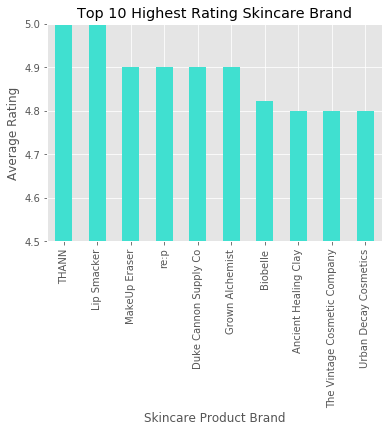

In [51]:
top10_skincare_brands= df_skincare.groupby('Product_brand').agg({'Product_rating':'mean','Tot_reviews':'sum','Product_price':'mean'}).sort_values(by='Product_rating',ascending=False).head(10)
top10_skincare_brands['Product_rating'].plot.bar(color = 'turquoise')
plt.xlabel('Skincare Product Brand')
plt.ylabel('Average Rating')
plt.ylim(4.5,5)
plt.title('Top 10 Highest Rating Skincare Brand')

### Top 10 Most Reviews Skincare Brands


Text(0.5, 1.0, 'Top 10 Most Reviews Skincare Brand')

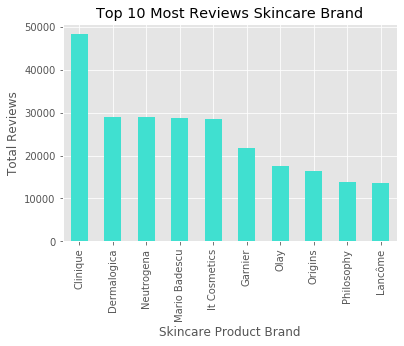

In [52]:
top10_skincare_brands = df_skincare.groupby('Product_brand').agg({'Product_rating':'mean','Tot_reviews':'sum','Product_price':'mean'}).sort_values(by='Tot_reviews',ascending=False).head(10)
top10_skincare_brands['Tot_reviews'].plot.bar(color = 'turquoise')
plt.xlabel('Skincare Product Brand')
plt.ylabel('Total Reviews')
plt.title('Top 10 Most Reviews Skincare Brand')

In [53]:
top10_skincare_brands

,Product_rating,Tot_reviews,Product_price
Product_brand,,,
Clinique,4.415574,48315.0,31.356557
Dermalogica,4.443590,29108.0,51.698718
Neutrogena,4.072414,29054.0,13.271149
Mario Badescu,4.282353,28667.0,18.835294
It Cosmetics,4.378947,28428.0,35.631579
Garnier,4.312000,21712.0,10.590000
Olay,4.431250,17467.0,23.897500
Origins,4.197872,16435.0,39.255319
Philosophy,4.321154,13810.0,42.076923


### Top 10 Highly Rated Makeup Brands


Text(0.5, 1.0, 'Top 10 Highest Rating Makeup Brand')

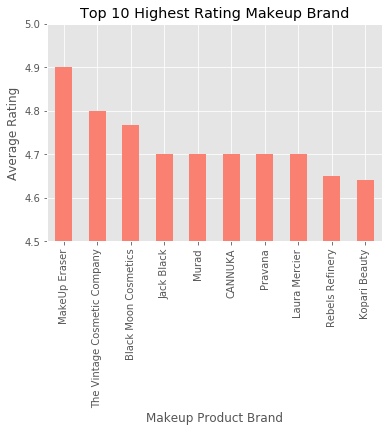

In [54]:
top10_makeup_brands= df_makeup.groupby('Product_brand').agg({'Product_rating':'mean','Tot_reviews':'sum','Product_price':'mean'}).sort_values(by='Product_rating',ascending=False).head(10)
top10_makeup_brands['Product_rating'].plot.bar(color = 'salmon')
plt.xlabel('Makeup Product Brand')
plt.ylabel('Average Rating')
plt.ylim(4.5,5)
plt.title('Top 10 Highest Rating Makeup Brand')

### Top 10 Most Reviews Makeup Brands

Text(0.5, 1.0, 'Top 10 Most Reviews Makeup Brand')

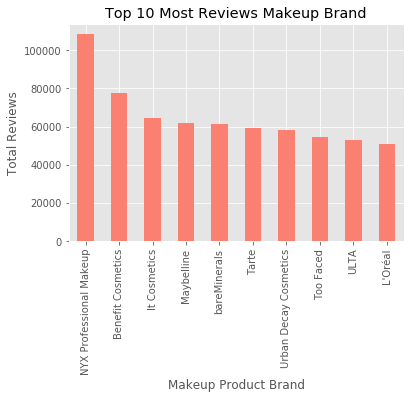

In [55]:
top10_makeup_brands = df_makeup.groupby('Product_brand').agg({'Product_rating':'mean','Tot_reviews':'sum','Product_price':'mean'}).sort_values(by='Tot_reviews',ascending=False).head(10)
top10_makeup_brands['Tot_reviews'].plot.bar(color = 'salmon')
plt.xlabel('Makeup Product Brand')
plt.ylabel('Total Reviews')
plt.title('Top 10 Most Reviews Makeup Brand')

In [56]:
top10_makeup_brands

,Product_rating,Tot_reviews,Product_price
Product_brand,,,
NYX Professional Makeup,4.039610,108371.0,10.334416
Benefit Cosmetics,4.285000,77507.0,22.700000
It Cosmetics,4.290769,64343.0,30.092308
Maybelline,3.949618,61704.0,9.092977
bareMinerals,4.337975,61374.0,23.911013
Tarte,4.163115,59281.0,23.885000
Urban Decay Cosmetics,4.370270,58405.0,28.783784
Too Faced,4.116393,54840.0,29.146066
ULTA,4.068902,52907.0,9.704085


### Top 5 Highly Rated Brands By Skincare Category 

In [57]:
df_skincare_agg = df_skincare.groupby(['Product_category','Product_brand']).agg({'Product_rating':'mean', 'Tot_reviews': 'sum','Product_price':'mean'})
top5_brands_skincare = df_skincare_agg.reset_index().groupby('Product_category').apply(lambda x: x.nlargest(5, 'Product_rating')).reset_index(drop=True)
top5_brands_skincare

,Product_category,Product_brand,Product_rating,Tot_reviews,Product_price
0,Cleansers,House 99 by David Beckham,5.000,16.0,20.000000
1,Cleansers,The Vintage Cosmetic Company,5.000,15.0,9.990000
2,Cleansers,Duke Cannon Supply Co,4.900,232.0,12.500000
3,Cleansers,MakeUp Eraser,4.900,69.0,20.000000
4,Cleansers,YUNI,4.900,182.0,15.000000
...,...,...,...,...,...
57,Treatment & Serums,Kitao,4.900,31.0,25.000000
58,Treatment & Serums,ACURE,4.850,23.0,18.990000
59,Treatment & Serums,Biobelle,4.825,280.0,4.406667
60,ULTA Collection,Neutrogena,4.200,479.0,12.490000


In [58]:
### All of the brands that are highly rated in more than one category
top5_brands_skincare.groupby('Product_brand').size().sort_values(ascending=False).head(8)

Product_brand
Duke Cannon Supply Co           2
Jack Black                      2
Biobelle                        2
The Vintage Cosmetic Company    2
Thayers                         2
COOLA                           2
Clarins                         2
Neutrogena                      2
dtype: int64

### Poorly Rated Brands By Skincare Category 

In [59]:
buttom5_brands_skincare = df_skincare_agg.reset_index().groupby('Product_category').apply(lambda x: x.nsmallest(5, 'Product_rating')).reset_index(drop=True)
buttom5_brands_skincare

,Product_category,Product_brand,Product_rating,Tot_reviews,Product_price
0,Cleansers,Wet n Wild,2.800000,16.0,4.990000
1,Cleansers,ULTA,3.350000,799.0,8.666667
2,Cleansers,Tarte,3.525000,107.0,15.000000
3,Cleansers,Earth Therapeutics,3.600000,219.0,8.000000
4,Cleansers,VitaminSea.beauty,3.600000,12.0,9.990000
...,...,...,...,...,...
57,Treatment & Serums,Yes to,3.235294,2330.0,6.842941
58,Treatment & Serums,Nia,3.400000,14.0,17.970000
59,Treatment & Serums,KYLIE SKIN,3.500000,37.0,28.000000
60,ULTA Collection,ULTA,3.950000,2225.0,11.081333


Text(0.5, 1.0, 'Poorly Rated Skincare Brands')

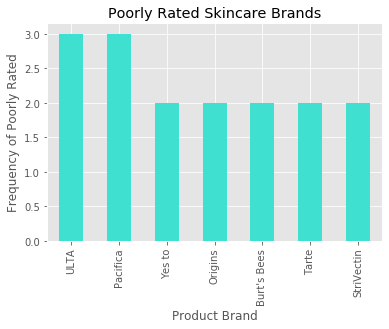

In [60]:
### All of the brands that are poorly rated in more than one category
buttom5_brands_skincare.groupby('Product_brand').size().sort_values(ascending=False).head(7).plot.bar(color = 'turquoise')
plt.xlabel('Product Brand')
plt.ylabel('Frequency of Poorly Rated')
plt.title('Poorly Rated Skincare Brands')

### Top 5 Highly Rated Brands By Makeup Category 

In [61]:
df_makeup_agg = df_makeup.groupby(['Product_category','Product_brand']).agg({'Product_rating':'mean', 'Tot_reviews': 'sum','Product_price':'mean'})
top5_brands_makeup = df_makeup_agg.reset_index().groupby('Product_category').apply(lambda x: x.nlargest(5, 'Product_rating')).reset_index(drop=True)
top5_brands_makeup.head(10)

,Product_category,Product_brand,Product_rating,Tot_reviews,Product_price
0,Eyes,ICONIC LONDON,4.9,53.0,40.00
1,Eyes,Black Moon Cosmetics,4.8,18.0,48.00
2,Eyes,NABLA,4.8,17.0,39.00
3,Eyes,SUGARPILL,4.7,22.0,28.00
4,Eyes,PYT Beauty,4.7,30.0,24.00
5,Face,MakeUp Eraser,4.9,69.0,20.00
6,Face,LashFood,4.8,16.0,18.00
7,Face,The Vintage Cosmetic Company,4.8,60.0,9.99
8,Face,Laura Mercier,4.7,80.0,43.50
9,Face,Mamonde,4.7,27.0,36.00


In [62]:
top5_brands_makeup.groupby('Product_brand').size().sort_values(ascending=False).head(5)

Product_brand
Base 4                   2
Urban Decay Cosmetics    2
Black Moon Cosmetics     2
I Heart Revolution       2
Benefit Cosmetics        1
dtype: int64

### Poorly Rated Brands By Makeup Category 

In [63]:
buttom5_brands_makeup = df_makeup_agg.reset_index().groupby('Product_category').apply(lambda x: x.nsmallest(5, 'Product_rating')).reset_index(drop=True)
buttom5_brands_makeup.head(10)

,Product_category,Product_brand,Product_rating,Tot_reviews,Product_price
0,Eyes,Tweezerman,2.500000,14.0,19.000000
1,Eyes,Juice Beauty,3.080000,259.0,22.400000
2,Eyes,Mavala,3.600000,19.0,39.000000
3,Eyes,KYLIE COSMETICS,3.671429,258.0,46.285714
4,Eyes,Almay,3.688889,2092.0,8.267778
5,Face,Too Cool For School,2.900000,19.0,4.970000
6,Face,CeraVe,3.050000,352.0,11.490000
7,Face,Wunder2,3.400000,25.0,22.000000
8,Face,KKW BEAUTY,3.450000,141.0,25.000000
9,Face,Butter London,3.700000,38.0,27.000000


Text(0.5, 1.0, 'Poorly Rated Makeup Brands')

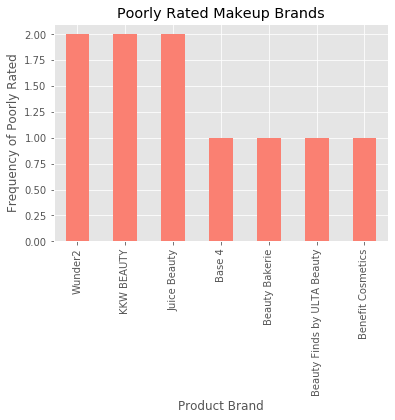

In [64]:
### All of the brands that are poorly rated in more than one category
buttom5_brands_makeup.groupby('Product_brand').size().sort_values(ascending=False).head(7).plot.bar(color = 'salmon')
plt.xlabel('Product Brand')
plt.ylabel('Frequency of Poorly Rated')
plt.title('Poorly Rated Makeup Brands')

### Brands That Have Both Skincare and Makeup Products

In [65]:
set1=set(df_skincare['Product_brand']) 
set2=set(df_makeup['Product_brand'])
shared_brands = list(set1 & set2)
df_shared = df_filtered[df_filtered['Product_brand'].apply(lambda x: x in shared_brands)]
len(shared_brands)

115

In [66]:
df_shared=pd.DataFrame(df_shared.groupby(['Top_category','Product_brand']).agg({'Product_name':'count','Product_rating':'mean', 'Tot_reviews': 'sum','Product_price':'mean'}).sort_values(by="Product_brand").reset_index())

In [67]:
# Some products are double listed in skincare and makeup category, 
nrows=len(df_shared)
for i in range(nrows):
    if i>=len(df_shared)-1:
        break
    elif all(df_shared.iloc[i,1:6] == df_shared.iloc[i+1,1:6]):
        df_shared.drop(i,inplace = True)
        df_shared.drop(i+1, inplace = True)
        df_shared.reset_index(drop=True,inplace=True)
        i = i-2
    else:
        continue
df_shared.reset_index(drop=True,inplace = True)
df_shared.shape

(222, 6)

In [68]:
### Top 10 shared brands in SkinCare 
top10_skincare=df_shared[df_shared.Top_category=="Skin Care"].sort_values(by="Product_rating",ascending=False).set_index('Product_brand').head(10)
set_skincare = set(top10_skincare.index)

In [69]:
### Top 10 shared brands in Makeup
top10_makeup = df_shared[df_shared.Top_category=="Makeup"].sort_values(by="Product_rating",ascending=False).set_index('Product_brand').head(10)
set_makeup = set(top10_makeup.index)

In [70]:
shared_brands=list(set_skincare & set_makeup)
df_shared[df_shared['Product_brand'].apply(lambda x: x in shared_brands)]

,Top_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price
98,Skin Care,Jack Black,11,4.754545,2600.0,31.997273
99,Makeup,Jack Black,1,4.700000,739.0,8.000000
182,Skin Care,The Vintage Cosmetic Company,2,4.800000,61.0,9.990000
183,Makeup,The Vintage Cosmetic Company,2,4.800000,60.0,9.990000


### Closer Look at Jack Black Skincare Products

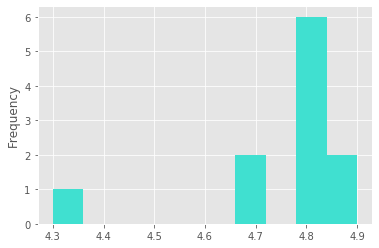

In [71]:
df_JackBlack_skincare = df_skincare[df_skincare.Product_brand == "Jack Black"]
#sns.distplot(df_JackBlack_skincare.Product_rating,color = 'turquoise')
df_JackBlack_skincare.Product_rating.plot.hist(color='turquoise')
#sns.jointplot(df_JackBlack_skincare['Tot_reviews'],df_JackBlack_skincare['Product_rating'])
# plt.xlabel('Product Rating')
# plt.title('Distribution of Jack Black Skincare Rating')

In [72]:
df_JackBlack_skincare.sample(5)

,Top_category,Product_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price,Product_size,Product_details
3722,Skin Care,Cleansers,Jack Black,Face Buff Energizing Scrub,4.3,41.0,30.0,Item 2238520,"Face Buff deep-cleans and smoothes your skin, ..."
1397,Skin Care,Gifts & Value Sets,Jack Black,Shave Essentials,4.9,173.0,25.0,Item 2518087,Pain-free shave essentials to instantly improv...
3487,Skin Care,Cleansers,Jack Black,Deep Dive Glycolic Facial Cleanser,4.8,253.0,23.0,Size 5.0 oz,Jack Black's Deep Dive Glycolic Facial Cleanse...
3413,Skin Care,Moisturizers,Jack Black,Clean Break Oil-Free Moisturizer,4.8,123.0,30.0,Size 3.3 oz,"Clean Break is a daily, oil-free facial moistu..."
2549,Skin Care,Treatment & Serums,Jack Black,Protein Booster Skin Serum,4.9,64.0,62.0,Size 2.0 oz,Protein Booster Skin Serum is a multifunctiona...


### Closer Look at Jack Black Makeup Products

Text(0.5, 1.0, 'Histogram of Jack Black Makeup Rating')

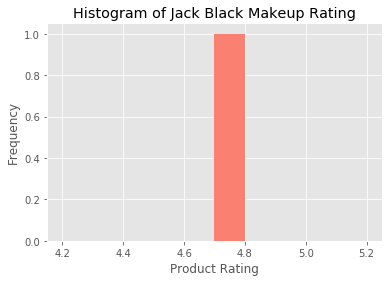

In [73]:
df_JackBlack_makeup = df_makeup[df_makeup.Product_brand == "Jack Black"]
#sns.distplot(df_JackBlack_skincare.Product_rating,color = 'turquoise')
df_JackBlack_makeup.Product_rating.plot.hist(color='salmon')
#sns.jointplot(df_JackBlack_skincare['Tot_reviews'],df_JackBlack_skincare['Product_rating'])
plt.xlabel('Product Rating')
plt.title('Histogram of Jack Black Makeup Rating')

### Export to csv file 

In [74]:
df_filtered.to_csv('Final Data.csv') 
df.sample(5)

,Top_category,Product_category,Product_brand,Product_name,Product_rating,Tot_reviews,Product_price,Product_size,Product_details
5376,Makeup,Face,Clinique,"Take The Day Off Makeup Remover For Lids, Lash...",4.7,1973.0,19.50,Item 2153847,Clinique's Take The Day Off Makeup Remover For...
5936,Makeup,Eyes,Makeup Revolution,Online Only Colour Book Shadow Palette CB05,3.6,5.0,20.00,Size 0.70 oz,"Packed full of pressed pigment powders, join t..."
7339,Makeup,Makeup Brushes & Tools,ULTA,Super Blender Sponge,4.1,475.0,4.99,Item 2251305,Blending made easy! Super Blender Sponge by Ul...
9269,Makeup,Face,MakeUp Eraser,Original Pink MakeUp Eraser,5.0,40.0,20.00,Item 2556128,Erase ALL makeup with JUST water! Including wa...
5914,Makeup,Eyes,NYX Professional Makeup,Online Only Such A Know-It-All Palette Vol. 1,4.0,1.0,35.00,Item 2558987,Show 'em how it's done with the Such a Know-It...
